# Imports

In [1]:
import os
import shutil

# Create LFW-10

In [2]:
# Path to your dataset folder
dataset_path = '../data/lfw/'

# Dictionary to store the number of images in each class (folder)
class_image_count = {}

# Loop through each folder (class)
for class_folder in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_folder)
    
    if os.path.isdir(class_folder_path):  # Check if it's a directory
        # Count the number of images in the folder
        image_count = len(os.listdir(class_folder_path))
        class_image_count[class_folder] = image_count

In [3]:
# Sort the classes by the number of images in descending order
sorted_classes = sorted(class_image_count.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 classes
top_10_classes = [class_name for class_name, count in sorted_classes[:10]]

print("Top 10 classes with the most samples:", top_10_classes)

Top 10 classes with the most samples: ['George_W_Bush', 'Colin_Powell', 'Tony_Blair', 'Donald_Rumsfeld', 'Gerhard_Schroeder', 'Ariel_Sharon', 'Hugo_Chavez', 'Junichiro_Koizumi', 'Jean_Chretien', 'John_Ashcroft']


In [4]:
# Loop through each class folder again
for class_folder in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_folder)
    
    if os.path.isdir(class_folder_path) and class_folder not in top_10_classes:
        # If the folder is not in the top 10, delete it
        print(f"Deleting folder: {class_folder}")
        
        shutil.rmtree(class_folder_path)

Deleting folder: Roger_Cook
Deleting folder: Derek_Bond
Deleting folder: Veronica_Lake
Deleting folder: Dawn_Staley
Deleting folder: Griffin_Colvin
Deleting folder: Ishaq_Shahryar
Deleting folder: Carlo_Azeglio_Ciampi
Deleting folder: Elizabeth_Hill
Deleting folder: Sharon_Robinson
Deleting folder: Bernard_Kerik
Deleting folder: Romano_Prodi
Deleting folder: Thomas_Cloyd
Deleting folder: Frank_Beamer
Deleting folder: Emma_Nicholson
Deleting folder: Mike_Leach
Deleting folder: Brian_Weaver
Deleting folder: Guillermo_Ruiz_Polanco
Deleting folder: Marsha_Sharp
Deleting folder: Ziwang_Xu
Deleting folder: Shireen_Amir_Begum
Deleting folder: Farouk_Kaddoumi
Deleting folder: Nicklas_Lidstrom
Deleting folder: John_Paul_DeJoria
Deleting folder: Stephen_Crampton
Deleting folder: Enrique_Haroldo_Gorriaran_Merlo
Deleting folder: Jonathan_Woodgate
Deleting folder: Mstislav_Rostropovich
Deleting folder: Carol_Carmody
Deleting folder: Isidro_Pastor
Deleting folder: Leuris_Pupo
Deleting folder: Suzann

# Find normalize values

In [5]:
import torch
from torchvision import datasets, transforms
import numpy as np

def compute_dataset_statistics(dataset_folder):
    # Define the transformation to convert images to tensor
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize images to 224x224; adjust as needed
        transforms.ToTensor()           # Convert image to tensor
    ])

    # Load dataset
    dataset = datasets.ImageFolder(root=dataset_folder, transform=transform)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

    # Initialize lists to store all pixel values
    pixel_values = []

    for images, _ in dataloader:
        # Move images to CPU and convert to numpy
        images = images.cpu().numpy()
        pixel_values.append(images)

    # Concatenate all pixel values
    pixel_values = np.concatenate(pixel_values, axis=0)
    
    # Compute mean and standard deviation
    mean = np.mean(pixel_values, axis=(0, 2, 3))
    std = np.std(pixel_values, axis=(0, 2, 3))

    return mean, std

mean, std = compute_dataset_statistics(dataset_path)
print(f"Mean: {mean}")
print(f"Std Dev: {std}")


Mean: [0.43636918 0.38563913 0.34477144]
Std Dev: [0.29639485 0.2698132  0.26158142]


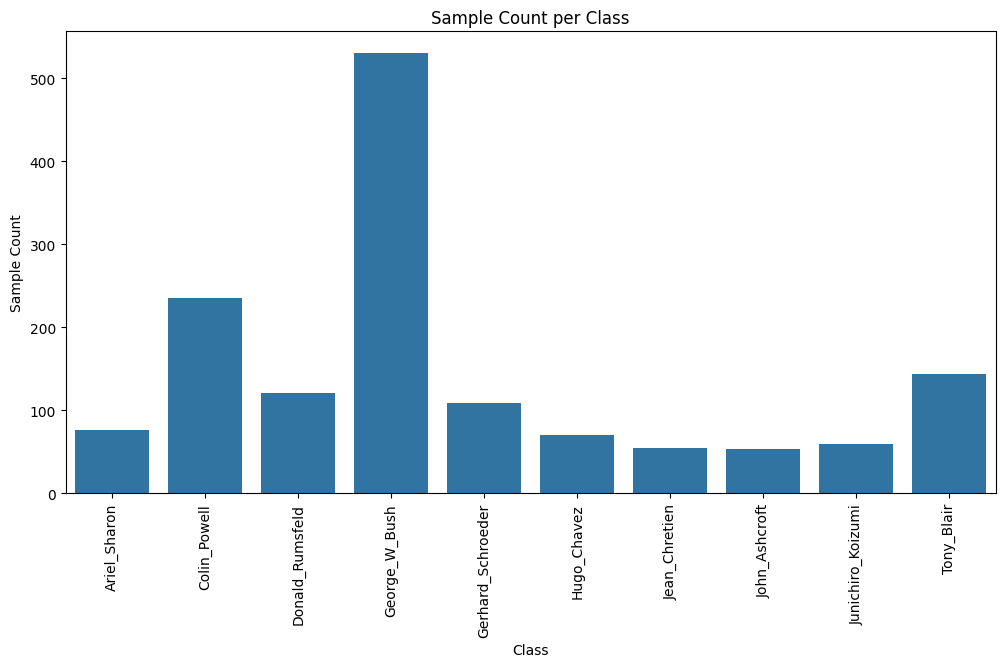

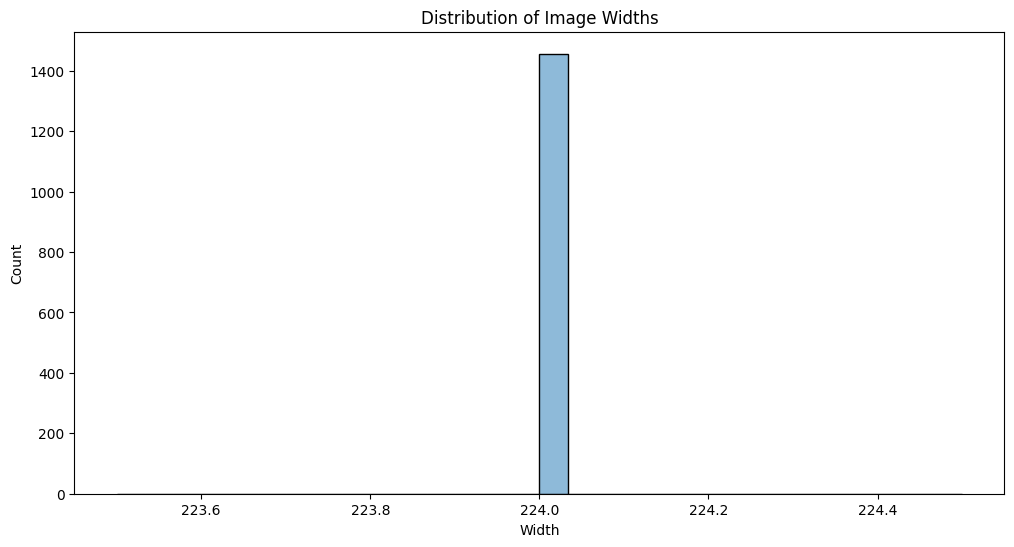

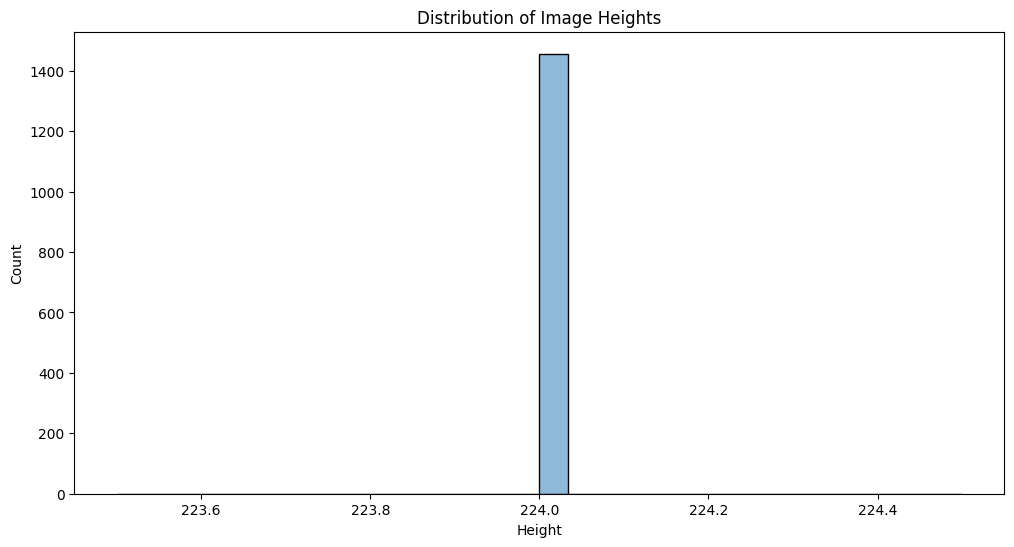

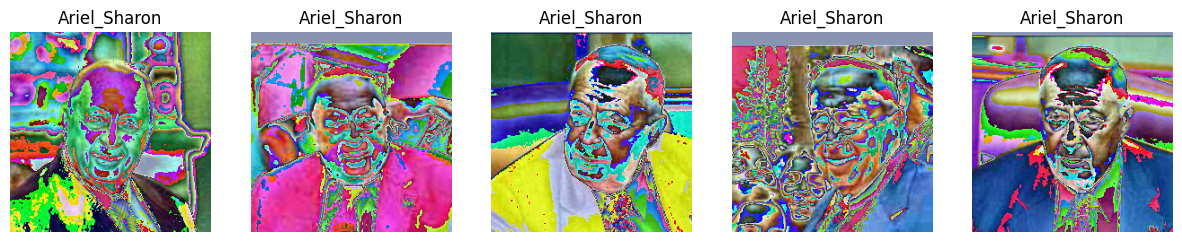

In [6]:
import torch
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_dataset(dataset_folder):
    # Define transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.43636918, 0.38563913, 0.34477144], std=[0.29639485, 0.2698132, 0.26158142])
    ])
    dataset = datasets.ImageFolder(root=dataset_folder, transform=transform)
    return dataset

def compute_image_dimensions(dataset):
    widths, heights = [], []
    for img, _ in dataset:
        img = transforms.ToPILImage()(img)
        width, height = img.size
        widths.append(width)
        heights.append(height)
    return widths, heights

def plot_sample_images(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    for i in range(num_samples):
        img, label = dataset[i]
        img = transforms.ToPILImage()(img)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(dataset.classes[label])
    plt.show()

def plot_eda(dataset_folder):
    dataset = load_dataset(dataset_folder)
    
    # 1. Sample Counts per Class
    class_names = dataset.classes
    sample_counts = [0] * len(class_names)
    for _, label in dataset:
        sample_counts[label] += 1

    df_class_counts = pd.DataFrame({
        'Class': class_names,
        'Sample Count': sample_counts
    })

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Class', y='Sample Count', data=df_class_counts)
    plt.xticks(rotation=90)
    plt.title('Sample Count per Class')
    plt.show()

    # 2. Image Width and Height Distributions
    widths, heights = compute_image_dimensions(dataset)
    
    df_dimensions = pd.DataFrame({
        'Width': widths,
        'Height': heights
    })

    plt.figure(figsize=(12, 6))
    sns.histplot(df_dimensions['Width'], kde=True, bins=30)
    plt.title('Distribution of Image Widths')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df_dimensions['Height'], kde=True, bins=30)
    plt.title('Distribution of Image Heights')
    plt.show()

    # 3. Display Sample Images
    plot_sample_images(dataset)

plot_eda(dataset_path)